# Import Libraries

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as patches
import re
import matplotlib.ticker as ticker



In [5]:

compound_forming = open('Compound Forming.txt','w') ### Opens a new file and writes data to it  
cf_T_1 = open('CF Temp less than 1.txt','w') 
cf_T_2 = open('CF Temp about 2.5.txt','w') 
cf_R_1 = open('CF Delta R 1.3-1.75.txt','w') 
cf_R_2 = open('CF Delta R 0.5-1.00.txt','w') 
space_between_green_dots = open('Green space.txt','w') 
cf_T_3 = open('CF Delta R = 1.0-1.3 space.txt','w') 
c_f_sulphur_only = open('CF Sulphur_only.txt','w') 
c_f_selenium_only = open('CF Selenium_only.txt','w') 

el11=['Be',
    'Mg',
    'Ca','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn',
    'Sr','Pd','Cd','Sn',
    'Ba','Sm','Eu','Yb',
    'Pt','Hg','Pb']  ### List of 2+ cations (Total = 23)
t11=[1556,
    923,
    1123,1938,2190,2176,1517,1812,1768,1728,1356,693,
    1043,1823,594,505,
    983,1345,1100,1087,
    2043,234,601]        ### Temperature of melting point 
r11=[1.08,
    2.03,
    3.00,2.58,2.43,2.44,2.22,2.11,2.02,2.18,2.04,1.88,
    3.21,2.45,2.215,1.88,
    3.40,4.14,3.94,3.59,
    2.70,2.41,2.09] ###Zunger pseudopotential radii 
v11= [2,
    2,
    2,4,5,6,7,8,9,10,11,12,
    2,10,12,4,
    2,3,3,3,
    10,12,4]
x11= [1.45,
    1.31,
    1.17,1.86,2.22,2,2.04,1.67,1.72,1.76,1.08,1.44,
    1.13,2.08,1.40,1.88,
    1.08,1.2,1.15,1.1,
    1.91,1.49,1.92]   #electronegativity


el4=['P']                              ### List of 4+ cations
t4=[870]                               ### Temperature of melting point 
r4=[1.24]                             ##Z unger pseudopotential radii
v4=[5]
x4=[2.32]

el2=['S','Se']             ### List of 2- cations
t2=[392,490]               ### Temperature of melting point 
r2=[1.10,1.285]            ###Z unger pseudopotential radii
v2=[6,6]
x2=[2.65,2.54]

# Generate a colormap using matplotlib's "Paired" color map
color_map = plt.get_cmap("Paired", len(el11))  # len(el11) defines how many colors are needed

# To get the colors from the colormap
colors = [color_map(i) for i in range(len(el11))]


#### iterate throught the list and display corresponding delta x and delta r 
i=0
l=0
m=0
k=0

for i in range (0,len(el11)):###iteration through all possible combinations of el1,el2,el3,and el4
     for k in range (0,len(el4)):
        for l in range (0,len(el2)):
                m=m+1
                #if el1[i]!= el3[j]:
                    #name = el1[i]+el3[j]+el4[k]+"2"+el2[l]+"6"+' '
                    #y=y+1
                    #print(name)
                name = el11[i]+el4[k]+el2[l]+"3"+' ' ### Displays the name of the interated compund
                #print(name)     
                num = [t11[i],t4[k],t2[l]]
                sorted_numbers = sorted(num, reverse=True)
                nmax,n2nd,n3rd=sorted_numbers
                
                delta_t = (float(nmax/n2nd)+float(nmax/n3rd)+float(n2nd/n3rd))/3
                #print(f"{delta_t:.2f}")
            
                Absdelta_r = (
                    abs(r11[i]-r4[k])+abs(r11[i]-r2[l])+
                    abs(r4[k]-r2[l]))/3  #Calculates <abs(ΔR)>
                #print(f"{Absdelta_r:.2f}")

                Absdelta_Nv = (
                    abs(v11[i]-v4[k])+abs(v11[i]-v2[l])+
                    abs(v4[k]-v2[l]))/3  #Calculates <abs(ΔNv)>
                #print(f"{Absdelta_Nv:.2f}")

                Absdelta_Neg = (
                    abs(x11[i]-x4[k])+abs(x11[i]-x2[l])+
                    abs(x4[k]-x2[l]))/3  #Calculates <abs(ΔX)>
                #print(f"{Absdelta_Neg:.2f}")
                
                outlist=str(m)+' '+name+str(delta_t)+' '+str(Absdelta_r)+' '+str(Absdelta_Nv)+ ' '+str(Absdelta_Neg)+' '+str(r11[i])+' '+ '\n'  ### creates a list of values with variables "name",
                compound_forming.write(outlist) ##writes outlist into the file we created in the beginning 

                if delta_t < 1:
                    outlist1=str(m)+' '+name+str(delta_t)+' '+str(Absdelta_r)+' '+str(Absdelta_Nv)+ ' '+str(Absdelta_Neg)+' '+str(r11[i])+' '+ '\n'  ### creates a list of values with variables "name",
                    cf_T_1.write(outlist1)  #writes outlist into the file we created in the beginning 
                if delta_t>= 1.65  and delta_t <= 1.95 :
                    outlist2=str(m)+' '+name+str(delta_t)+' '+str(Absdelta_r)+' '+str(Absdelta_Nv)+ ' '+str(Absdelta_Neg)+' '+str(r11[i])+' '+ '\n'  ### creates a list of values with variables "name",
                    cf_T_2.write(outlist2) 
                if delta_t>= 2.8  and delta_t <= 3 :
                    outlist2=str(m)+' '+name+str(delta_t)+' '+str(Absdelta_r)+' '+str(Absdelta_Nv)+ ' '+str(Absdelta_Neg)+' '+str(r11[i])+' '+ '\n'  ### creates a list of values with variables "name",
                    cf_T_2.write(outlist2) 
                if delta_t>= 2  and delta_t <= 2.3 :
                    outlist2=str(m)+' '+name+str(delta_t)+' '+str(Absdelta_r)+' '+str(Absdelta_Nv)+ ' '+str(Absdelta_Neg)+' '+str(r11[i])+' '+ '\n'  ### creates a list of values with variables "name",
                    cf_T_2.write(outlist2)              
                if Absdelta_r >= 1.3  and delta_t <= 1.75 :
                    outlist3=str(m)+' '+name+str(delta_t)+' '+str(Absdelta_r)+' '+str(Absdelta_Nv)+ ' '+str(Absdelta_Neg)+' '+str(r11[i])+' '+ '\n'  ### creates a list of values with variables "name",
                    cf_R_1.write(outlist3)     
                if Absdelta_r >= 0.5  and Absdelta_r <= 1 :
                    outlist4=str(m)+' '+name+str(delta_t)+' '+str(Absdelta_r)+' '+str(Absdelta_Nv)+ ' '+str(Absdelta_Neg)+' '+str(r11[i])+' '+ '\n'  ### creates a list of values with variables "name",
                    cf_R_2.write(outlist4)  
                if (1.0 <= Absdelta_r <= 1.3):
                    outlist6=str(m)+' '+name+str(delta_t)+' '+str(Absdelta_r)+' '+str(Absdelta_Nv)+ ' '+str(Absdelta_Neg)+' '+str(r11[i])+' '+'\n'  ### creates a list of values with variables "name",
                    cf_T_3.write(outlist6) 
                if (1.0 <= Absdelta_r <= 1.3) and (1.9 <=  delta_t <= 2.3):
                    outlist5=str(m)+' '+name+str(delta_t)+' '+str(Absdelta_r)+' '+str(Absdelta_Nv)+ ' '+str(Absdelta_Neg)+' '+str(r11[i])+' '+ '\n'  ### creates a list of values with variables "name",
                    space_between_green_dots.write(outlist5)       
                if l == 0:
                    outlist7=str(m)+' '+name+str(delta_t)+' '+str(Absdelta_r)+' '+str(Absdelta_Nv)+ ' '+str(Absdelta_Neg)+' '+str(r11[i])+' '+ '\n'  ### creates a list of values with variables "name",
                    c_f_sulphur_only.write(outlist7) 
                if l == 1:
                    outlist8=str(m)+' '+name+str(delta_t)+' '+str(Absdelta_r)+' '+str(Absdelta_Nv)+ ' '+str(Absdelta_Neg)+' '+str(r11[i])+' '+ '\n'  ### creates a list of values with variables "name",
                    c_f_selenium_only.write(outlist8)

compound_forming.close() ### closes text file
cf_T_1.close()
cf_T_2.close()
cf_R_1.close()
cf_R_2.close()
space_between_green_dots.close()
cf_T_3.close()
c_f_sulphur_only.close()
c_f_selenium_only.close()


# In[7]:


my_file = open('CF ICSD Structure.txt','w') ### Opens a new file and writes data to it
my_file1 = open('CF unclassified total.txt','w') ### Opens a new file and writes data to it  
my_file2 = open('CF ICSD no S-Types.txt','w') ### Opens a new file and writes data to it  

with open ('Compound Forming.txt', "r") as myfile:
    data = [line.strip() for line in myfile]
    data1 = [line.split()for line in data]


# In[8]:


#If you want to include the outsider, you need to remove the #for the list you want
# Structure types definition with potential overlaps
FePS3    = ("NiPSe3","ZnPS3","MnPS3","FePS3","NiPS3","MgPS3","CoPS3","PdPS3","CrPSe3","VPS3")
FePSe3   = ("CdPSe3","MnPSe3","FePSe3","MgPSe3","CdPS3","SnPS3",)
not_in_Structure_types = ("ZnPSe3",) 
MnP4 = ('HgPS3',)
Hg2P2Se6 = ('HgPSe3',)

# Entry with structure types - 2D vdW
structure_types = (FePS3, FePSe3, MnP4, Hg2P2Se6)
S_types_name = ("FePS3", "FePSe3", "MnP4", "Hg2P2Se6")  # Just for name

written_entries = set()  # Track written entries

for i in range(len(structure_types)):
    for j in range(len(structure_types[i])):
        for k in range(len(data1)):
            S = str(structure_types[i][j]).strip()  # Strip any extra spaces
            entry = (str(data1[k][1]) + ' ' + str(data1[k][2]) + ' ' + str(data1[k][3]) + 
                     ' ' + str(data1[k][4]) + ' ' + str(data1[k][5]) + ' ' + str(i) + 
                     ' ' + str(S_types_name[i]) + ' ' + str(data1[k][6]))

            if S == data1[k][1].strip():  # Ensure correct matching
                if entry not in written_entries:
                    my_file.write(entry + '\n')
                    written_entries.add(entry)
                break  # Stop after the entry is written to one file

            # Handle the case where the compound doesn't match any structure type
            elif data1[k][1].strip() != S:
                line1 = (str(data1[k][1]) + ' ' + str(data1[k][2]) + ' ' + str(data1[k][3]) + 
                         ' ' + str(data1[k][4]) + ' ' + str(data1[k][5]) + ' ' + str(data1[k][6]))
                if line1 not in written_entries:
                    my_file1.write(line1 + '\n')
                    written_entries.add(line1)

# Writing compounds without structure types to 'CF ICSD no S-Types.txt'
for l in range(len(not_in_Structure_types)):
    for m in range(len(data1)):
        S = str(not_in_Structure_types[l]).strip().lower()  # Strip and convert to lowercase
        data_entry = data1[m][1].strip().lower()  # Strip and convert to lowercase

        # Compare the stripped and lowercase strings
        if S == data_entry:
            not_in_S_types = (str(l) + ' ' + str(data1[m][1]) + ' ' + str(data1[m][2]) + 
                              ' ' + str(data1[m][3]) + ' ' + str(data1[m][4]) + ' ' + str(data1[m][5]) + 
                              ' ' + str(data1[m][6]) + '\n')
            my_file2.write(not_in_S_types)
                  
my_file.close()
my_file1.close()
my_file2.close()




# Generate all potential ternary compositions and calculate their properties based on atomic parameters


## Quantum Structure Diagram (Radii vs Melting temperature)


/tmp/ipykernel_9895/91871321.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(),fontsize = 15)
/tmp/ipykernel_9895/91871321.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(),fontsize = 15)


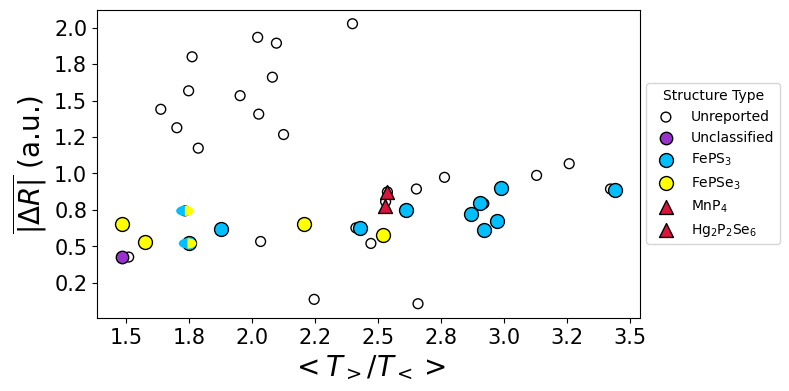

In [10]:
S_types = ("FePS3","FePSe3","MnP4","Hg2P2Se6")
def to_subscript(s):
    return re.sub(r'(\d)', r'$_{\1}$', s)

S_types_with_subscripts = [to_subscript(name) for name in S_types]

color = sns.color_palette("Paired", len(S_types))

inlist = np.loadtxt('CF ICSD Structure.txt',dtype = float, usecols=(1,2,3,4,5),delimiter=' ') 
inlist_char = np.loadtxt('CF ICSD Structure.txt',dtype = str, usecols=(0),delimiter=' ')  #column-0: compound name
inlist_val = np.loadtxt('CF ICSD Structure.txt',dtype = int, usecols=(5),delimiter=' ')  #column-5: the number corresponds to the structure type, this is define color coating
not_Classified = np.loadtxt('CF ICSD no S-Types.txt', dtype=float, usecols=(2,3,4,5), delimiter=' ')
not_inlist = np.loadtxt('CF unclassified total.txt',dtype = float, usecols=(1,2,3,4),delimiter= ' ')


#Graph, change the number of column for x and y (0,Temp)(1,Radii)(2,Valence)(3,EleNa)

#fig = plt.plot()
fig, ax = plt.subplots(figsize=(4, 4))  # Set the figure size to 4x4 inches
ax = plt.subplot()
ax.scatter((not_inlist[:,0]),(not_inlist[:,1]), edgecolor = 'black', s = 50, label = "Unreported",marker = 'o',facecolors='none') #ax.scatter:create a scatter plot
ax.scatter((not_Classified[0]),(not_Classified[1]), c = 'darkorchid',edgecolor = 'black', s = 80, label = "Unclassified", marker = 'o',)

inlist = np.array(inlist)
#color_map ={0:'deepskyblue',1:'yellow'}
color_map = {
    0: ('deepskyblue', 'o', 100, 1),  # FePS3: bright magenta (corrected spelling)
    1: ('yellow', 'o', 100, 1),     # FePSe3: vivid cyan
}



inlist_val = inlist[:, 4].astype(int)
excluded_indices = [15,16]


import matplotlib.patches as patches

# Set to keep track of points that have already been plotted
plotted_points = set()

# Plot data and structure points, ensuring "SnPS3" and "CdPS3" appear only once
for i in range(len(inlist)):  # Plot the structure from ICSD 
    x = inlist[i, 0]
    y = inlist[i, 1]
    label = inlist_val[i]

    # Define the point identifier as a tuple (x, y) to check for duplicates
    point_id = (x, y)
    
    # Check if the point has already been plotted
    if point_id in plotted_points:
        continue  # Skip this point if it has already been plotted
    
    # Mark the point as plotted
    plotted_points.add(point_id)

    # Special handling for "SnPS3" and "CdPS3"
    if inlist_char[i] == 'SnPS3' or inlist_char[i] == 'CdPS3':

     # Add wedges (half magenta, half cyan) to represent both SnPS3 and CdPS3 with the same size as scatter points
        half_1 = patches.Wedge((x, y), 0.035, 90, 270, facecolor='deepskyblue', edgecolor='none')  # Half magenta
        half_2 = patches.Wedge((x, y), 0.035, 270, 90, facecolor='yellow', edgecolor='none')    # Half cyan
        ax.add_patch(half_1)
        ax.add_patch(half_2)
        # Ensure the aspect ratio of the plot is equal to make the wedges circular
        ax.set_aspect('auto')
    else:
        # Plot normal scatter points for other compounds
        color_marker_tuple = color_map.get(label, ('crimson', '^', 120, 1.0))  # Default to red triangle
        color, marker, size, alpha = color_marker_tuple  # Unpack the tuple
        label_with_subscript = S_types_with_subscripts[inlist_val[i]]
        ax.scatter(x, y, c=color, s=100, edgecolors='black', marker=marker, label=label_with_subscript, alpha=alpha)

        

def legend_without_duplicate_labels(figure):  # defines a function named "legend_without_duplicate_labels(figure)" how labels are input in to the legend and removes duplicate legend labels
    handles, labels = ax.get_legend_handles_labels()  # retirieves label values and stores as handles
    by_label = dict(zip(labels, handles))  #organizes dictionary with zip by order in which the label is first passed and stores new dictionary as by_label. sets labels as the key and handles as the values
    
    lgd = ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5),title = "Structure Type")  #sets lgd as the list in the dic with no duplicate keys. loc and bbox will define the location of the legend box. 


legend_without_duplicate_labels(ax)


#Title and labels
#plt.title(r'$A^{2+}$' + "Compound Forming Map", fontsize = 20)   
plt.xlabel(r'$<T_{>}/T_{<}>$',fontsize = 20)
#plt.ylabel("ΔR mean (a.u.)", fontsize = 20)
plt.ylabel(r"$\overline{|ΔR|}$ (a.u.)", fontsize=20)

#x and y tick labels
ax.set_xticklabels(ax.get_xticks(),fontsize = 15)
ax.set_yticklabels(ax.get_yticks(),fontsize = 15)

ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))


#Save and show figure
ax.figure.set_figwidth(7)     
plt.savefig("Plot-2+-T&R ", dpi= 600, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)


"""ax.figure.set_figwidth(7)
plt.savefig("CF Figure width 7 ", dpi= 300, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)"""

"""ax.figure.set_figwidth(15)               
plt.savefig("CF Figure width 15 ", dpi= 300, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)"""


plt.show()


## Quantum Structure Diagram (Melting temperature vs Valence electron)


/tmp/ipykernel_9895/3716908712.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(),fontsize = 15)
/tmp/ipykernel_9895/3716908712.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(),fontsize = 15)


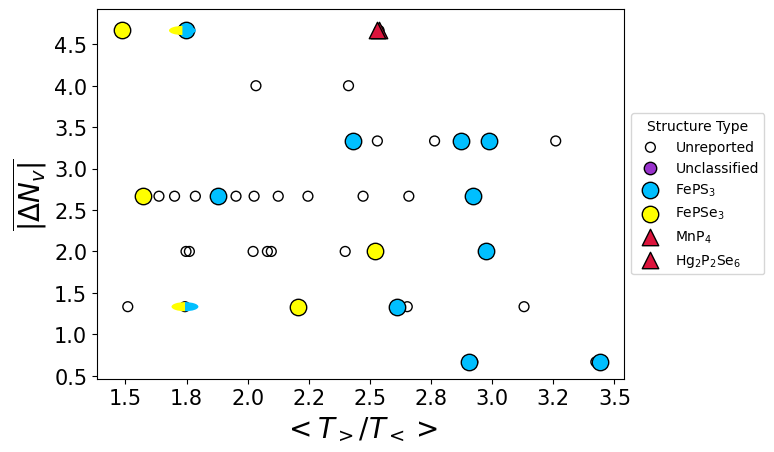

Number of compounds plotted: 18


In [4]:
S_types = ("FePS3","FePSe3","MnP4","Hg2P2Se6")
def to_subscript(s):
    return re.sub(r'(\d)', r'$_{\1}$', s)

S_types_with_subscripts = [to_subscript(name) for name in S_types]

color = sns.color_palette("Paired", len(S_types))

inlist = np.loadtxt('CF ICSD Structure.txt',dtype = float, usecols=(1,2,3,4,5),delimiter=' ') 
inlist_char = np.loadtxt('CF ICSD Structure.txt',dtype = str, usecols=(0),delimiter=' ')  #column-0: compound name
inlist_val = np.loadtxt('CF ICSD Structure.txt',dtype = int, usecols=(5),delimiter=' ')  #column-5: the number corresponds to the structure type, this is define color coating
not_Classified = np.loadtxt('CF ICSD no S-Types.txt', dtype=float, usecols=(2,3,4,5), delimiter=' ')
not_inlist = np.loadtxt('CF unclassified total.txt',dtype = float, usecols=(1,2,3,4),delimiter= ' ')


#Graph, change the number of column for x and y (0,Temp)(1,Radii)(2,Valence)(3,EleNa)

fig = plt.plot()
#fig, ax = plt.subplots(figsize=(3, 4.5))  # Set the figure size to 4x4 inches
ax = plt.subplot()
# Ensure the aspect ratio of the plot is equal to make the wedges circular
#ax.set_aspect('0.72')
ax.scatter((not_inlist[:,0]),(not_inlist[:,2]), edgecolor = 'black', s = 50, label = "Unreported",marker = 'o',facecolors='none') #ax.scatter:create a scatter plot
ax.scatter((not_Classified[0]),(not_Classified[2]), c = 'darkorchid',edgecolor = 'black', s = 80, label = "Unclassified", marker = 'o',)

inlist = np.array(inlist)
#color_map ={0:'magenta',1:'cyan'}
color_map = {
    0: ('deepskyblue', 'o', 100, 1),  # FePS3: bright magenta (corrected spelling)
    1: ('yellow', 'o', 100, 1),     # FePSe3: vivid cyan
}



inlist_val = inlist[:, 4].astype(int)
excluded_indices = [15,16]


import matplotlib.patches as patches

# Set to keep track of points that have already been plotted
plotted_points = set()

# Plot data and structure points, handle duplicate (x, y) by slightly shifting overlapping points
for i in range(len(inlist)):  # Plot the structure from ICSD 
    x = inlist[i, 0]
    y = inlist[i, 2]
    label = inlist_val[i]

    # Handle potential overlap of points by adding a small random offset if the point was plotted
    if (x, y) in plotted_points:
        x += np.random.uniform(-0.01, 0.01)  # Small offset
        y += np.random.uniform(-0.01, 0.01)

    plotted_points.add((x, y))  # Add the point to the set

    # Special handling for "SnPS3" and "CdPS3"
    if inlist_char[i] == 'SnPS3' or inlist_char[i] == 'CdPS3':
        half_1 = patches.Wedge((x, y), 0.055, 270, 90, facecolor='deepskyblue', edgecolor='none')
        half_2 = patches.Wedge((x, y), 0.055, 90, 270, facecolor='yellow', edgecolor='none')
        ax.add_patch(half_1)
        ax.add_patch(half_2)
    else:
        color_marker_tuple = color_map.get(label, ('crimson', '^', 120, 1.0))
        color, marker, size, alpha = color_marker_tuple
        label_with_subscript = S_types_with_subscripts[inlist_val[i]]
        ax.scatter(x, y, c=color, s=140, edgecolors='black', marker=marker, label=label_with_subscript, alpha=alpha)
        

def legend_without_duplicate_labels(figure):  # defines a function named "legend_without_duplicate_labels(figure)" how labels are input in to the legend and removes duplicate legend labels
    handles, labels = ax.get_legend_handles_labels()  # retirieves label values and stores as handles
    by_label = dict(zip(labels, handles))  #organizes dictionary with zip by order in which the label is first passed and stores new dictionary as by_label. sets labels as the key and handles as the values
    
    lgd = ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5),title = "Structure Type")  #sets lgd as the list in the dic with no duplicate keys. loc and bbox will define the location of the legend box. 


legend_without_duplicate_labels(ax)


#Title and labels
#plt.title(r'$A^{2+}$' + "Compound Forming Map", fontsize = 20)   
plt.xlabel(r'$<T_{>}/T_{<}>$',fontsize = 20)
plt.ylabel(r"$\overline{|\Delta N_{v}|}$", fontsize=20)

#x and y tick labels
ax.set_xticklabels(ax.get_xticks(),fontsize = 15)
ax.set_yticklabels(ax.get_yticks(),fontsize = 15)

ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))






#Save and show figure
ax.figure.set_figwidth(6.8) 
 
plt.savefig("Plot-2+-T&V ", dpi= 600, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)


"""ax.figure.set_figwidth(7)
plt.savefig("CF Figure width 7 ", dpi= 300, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)"""

"""ax.figure.set_figwidth(15)               
plt.savefig("CF Figure width 15 ", dpi= 300, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)"""


plt.show()
num_plotted = len(plotted_points)
print(f"Number of compounds plotted: {num_plotted}")

## Quantum Structure Diagram (Radii vs Valence electron)


/tmp/ipykernel_9895/2044492941.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(),fontsize = 15)
/tmp/ipykernel_9895/2044492941.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(),fontsize = 15)


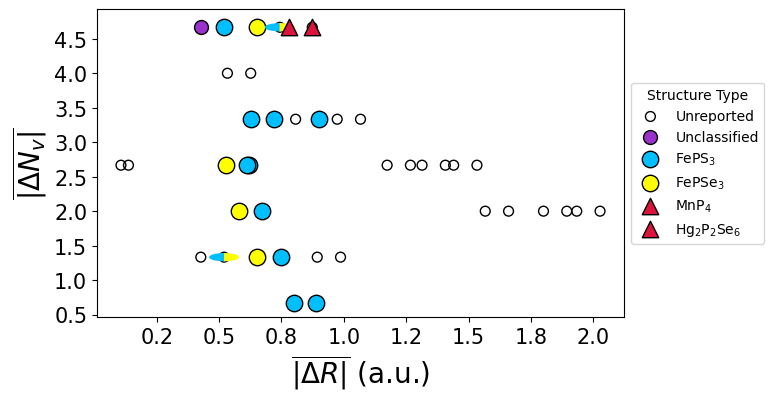

In [7]:
S_types = ("FePS3","FePSe3","MnP4","Hg2P2Se6")
def to_subscript(s):
    return re.sub(r'(\d)', r'$_{\1}$', s)

S_types_with_subscripts = [to_subscript(name) for name in S_types]

color = sns.color_palette("Paired", len(S_types))

inlist = np.loadtxt('CF ICSD Structure.txt',dtype = float, usecols=(1,2,3,4,5),delimiter=' ') 
inlist_char = np.loadtxt('CF ICSD Structure.txt',dtype = str, usecols=(0),delimiter=' ')  #column-0: compound name
inlist_val = np.loadtxt('CF ICSD Structure.txt',dtype = int, usecols=(5),delimiter=' ')  #column-5: the number corresponds to the structure type, this is define color coating
not_Classified = np.loadtxt('CF ICSD no S-Types.txt', dtype=float, usecols=(2,3,4,5), delimiter=' ')
not_inlist = np.loadtxt('CF unclassified total.txt',dtype = float, usecols=(1,2,3,4),delimiter= ' ')


#Graph, change the number of column for x and y (0,Temp)(1,Radii)(2,Valence)(3,EleNa)

#fig = plt.plot()
fig, ax = plt.subplots(figsize=(4, 4))  # Set the figure size to 4x4 inches
ax = plt.subplot()
ax.scatter((not_inlist[:,1]),(not_inlist[:,2]), edgecolor = 'black', s = 50, label = "Unreported",marker = 'o',facecolors='none') #ax.scatter:create a scatter plot
ax.scatter((not_Classified[1]),(not_Classified[2]), c = 'darkorchid',edgecolor = 'black', s = 100, label = "Unclassified", marker = 'o',)

inlist = np.array(inlist)
#color_map ={0:'magenta',1:'cyan'}
color_map = {
    0: ('deepskyblue', 'o', 100, 1),  # FePS3: bright magenta (corrected spelling)
    1: ('yellow', 'o', 100, 1),     # FePSe3: vivid cyan
}



inlist_val = inlist[:, 4].astype(int)
excluded_indices = [15,16]


import matplotlib.patches as patches

# Set to keep track of points that have already been plotted
plotted_points = set()

# Plot data and structure points, ensuring "SnPS3" and "CdPS3" appear only once
for i in range(len(inlist)):  # Plot the structure from ICSD 
    x = inlist[i, 1]
    y = inlist[i, 2]
    label = inlist_val[i]

    # Define the point identifier as a tuple (x, y) to check for duplicates
    point_id = (x, y)
    
    # Check if the point has already been plotted
    if point_id in plotted_points:
        continue  # Skip this point if it has already been plotted
    
    # Mark the point as plotted
    plotted_points.add(point_id)

    # Special handling for "SnPS3" and "CdPS3"
    if inlist_char[i] == 'SnPS3' or inlist_char[i] == 'CdPS3':

     # Add wedges (half magenta, half cyan) to represent both SnPS3 and CdPS3 with the same size as scatter points
        half_1 = patches.Wedge((x, y), 0.06, 90, 270, facecolor='deepskyblue', edgecolor='none')  # Half magenta
        half_2 = patches.Wedge((x, y), 0.06, 270, 90, facecolor='yellow', edgecolor='none')    # Half cyan
        ax.add_patch(half_1)
        ax.add_patch(half_2)
        # Ensure the aspect ratio of the plot is equal to make the wedges circular
        ax.set_aspect('auto')
    else:
        # Plot normal scatter points for other compounds
        color_marker_tuple = color_map.get(label, ('crimson', '^', 120, 1.0))  # Default to red triangle
        color, marker, size, alpha = color_marker_tuple  # Unpack the tuple
        label_with_subscript = S_types_with_subscripts[inlist_val[i]]
        ax.scatter(x, y, c=color, s=140, edgecolors='black', marker=marker, label=label_with_subscript, alpha=alpha)

        

def legend_without_duplicate_labels(figure):  # defines a function named "legend_without_duplicate_labels(figure)" how labels are input in to the legend and removes duplicate legend labels
    handles, labels = ax.get_legend_handles_labels()  # retirieves label values and stores as handles
    by_label = dict(zip(labels, handles))  #organizes dictionary with zip by order in which the label is first passed and stores new dictionary as by_label. sets labels as the key and handles as the values
    
    lgd = ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5),title = "Structure Type")  #sets lgd as the list in the dic with no duplicate keys. loc and bbox will define the location of the legend box. 


legend_without_duplicate_labels(ax)


#Title and labels
#plt.title(r'$A^{2+}$' + "Compound Forming Map", fontsize = 20)   
plt.xlabel(r"$\overline{|ΔR|}$ (a.u.)", fontsize=20)
plt.ylabel(r"$\overline{|\Delta N_{v}|}$", fontsize=20)

#x and y tick labels
ax.set_xticklabels(ax.get_xticks(),fontsize = 15)
ax.set_yticklabels(ax.get_yticks(),fontsize = 15)

ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))






#Save and show figure
ax.figure.set_figwidth(6.8)     
plt.savefig("Plot-2+-R&V ", dpi= 600, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)


"""ax.figure.set_figwidth(7)
plt.savefig("CF Figure width 7 ", dpi= 300, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)"""

"""ax.figure.set_figwidth(15)               
plt.savefig("CF Figure width 15 ", dpi= 300, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)"""


plt.show()

## Quantum Structure Diagram (Radii vs Electronegativity)


/tmp/ipykernel_9895/1791190620.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(),fontsize = 15)
/tmp/ipykernel_9895/1791190620.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(),fontsize = 15)


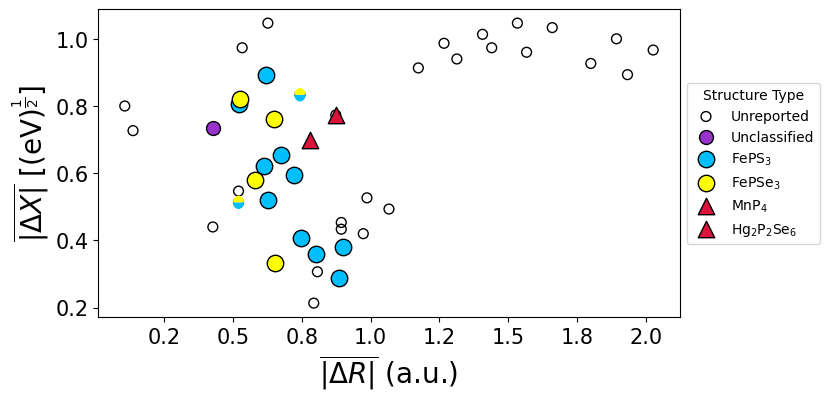

In [13]:
S_types = ("FePS3","FePSe3","MnP4","Hg2P2Se6")
def to_subscript(s):
    return re.sub(r'(\d)', r'$_{\1}$', s)

S_types_with_subscripts = [to_subscript(name) for name in S_types]

color = sns.color_palette("Paired", len(S_types))

inlist = np.loadtxt('CF ICSD Structure.txt',dtype = float, usecols=(1,2,3,4,5),delimiter=' ') 
inlist_char = np.loadtxt('CF ICSD Structure.txt',dtype = str, usecols=(0),delimiter=' ')  #column-0: compound name
inlist_val = np.loadtxt('CF ICSD Structure.txt',dtype = int, usecols=(5),delimiter=' ')  #column-5: the number corresponds to the structure type, this is define color coating
not_Classified = np.loadtxt('CF ICSD no S-Types.txt', dtype=float, usecols=(2,3,4,5), delimiter=' ')
not_inlist = np.loadtxt('CF unclassified total.txt',dtype = float, usecols=(1,2,3,4),delimiter= ' ')


#Graph, change the number of column for x and y (0,Temp)(1,Radii)(2,Valence)(3,EleNa)

#fig = plt.plot()
fig, ax = plt.subplots(figsize=(4, 4))  # Set the figure size to 4x4 inches
ax = plt.subplot()
ax.scatter((not_inlist[:,1]),(not_inlist[:,3]), edgecolor = 'black', s = 50, label = "Unreported",marker = 'o',facecolors='none') #ax.scatter:create a scatter plot
ax.scatter((not_Classified[1]),(not_Classified[3]), c = 'darkorchid',edgecolor = 'black', s = 100, label = "Unclassified", marker = 'o',)

inlist = np.array(inlist)
#color_map ={0:'magenta',1:'cyan'}
color_map = {
    0: ('deepskyblue', 'o', 100, 1),  # FePS3: bright magenta (corrected spelling)
    1: ('yellow', 'o', 100, 1),     # FePSe3: vivid cyan
}



inlist_val = inlist[:, 4].astype(int)
excluded_indices = [15,16]


import matplotlib.patches as patches

# Set to keep track of points that have already been plotted
plotted_points = set()

# Plot data and structure points, ensuring "SnPS3" and "CdPS3" appear only once
for i in range(len(inlist)):  # Plot the structure from ICSD 
    x = inlist[i, 1]
    y = inlist[i, 3]
    label = inlist_val[i]

    # Define the point identifier as a tuple (x, y) to check for duplicates
    point_id = (x, y)
    
    # Check if the point has already been plotted
    if point_id in plotted_points:
        continue  # Skip this point if it has already been plotted
    
    # Mark the point as plotted
    plotted_points.add(point_id)

    # Special handling for "SnPS3" and "CdPS3"
    if inlist_char[i] == 'SnPS3' or inlist_char[i] == 'CdPS3':

     # Add wedges (half magenta, half cyan) to represent both SnPS3 and CdPS3 with the same size as scatter points
        half_1 = patches.Wedge((x, y), 0.02, 180, 360, facecolor='deepskyblue', edgecolor='none')  # Half magenta
        half_2 = patches.Wedge((x, y), 0.02, 360, 180, facecolor='yellow', edgecolor='none')    # Half cyan
        ax.add_patch(half_1)
        ax.add_patch(half_2)
        # Ensure the aspect ratio of the plot is equal to make the wedges circular
        ax.set_aspect('auto')
    else:
        # Plot normal scatter points for other compounds
        color_marker_tuple = color_map.get(label, ('crimson', '^', 120, 1.0))  # Default to red triangle
        color, marker, size, alpha = color_marker_tuple  # Unpack the tuple
        label_with_subscript = S_types_with_subscripts[inlist_val[i]]
        ax.scatter(x, y, c=color, s=140, edgecolors='black', marker=marker, label=label_with_subscript, alpha=alpha)

        

def legend_without_duplicate_labels(figure):  # defines a function named "legend_without_duplicate_labels(figure)" how labels are input in to the legend and removes duplicate legend labels
    handles, labels = ax.get_legend_handles_labels()  # retirieves label values and stores as handles
    by_label = dict(zip(labels, handles))  #organizes dictionary with zip by order in which the label is first passed and stores new dictionary as by_label. sets labels as the key and handles as the values
    
    lgd = ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5),title = "Structure Type")  #sets lgd as the list in the dic with no duplicate keys. loc and bbox will define the location of the legend box. 


legend_without_duplicate_labels(ax)


#Title and labels
#plt.title(r'$A^{2+}$' + "Compound Forming Map", fontsize = 20)   
plt.xlabel(r"$\overline{|ΔR|}$ (a.u.)", fontsize=20)
plt.ylabel(r"$\overline{|\Delta X|}$ [(eV)$^{\frac{1}{2}}$]", fontsize=20)

#x and y tick labels
ax.set_xticklabels(ax.get_xticks(),fontsize = 15)
ax.set_yticklabels(ax.get_yticks(),fontsize = 15)

ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))






#Save and show figure
ax.figure.set_figwidth(7.5)     
plt.savefig("Plot-2+-R&EN ", dpi= 600, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)


"""ax.figure.set_figwidth(7)
plt.savefig("CF Figure width 7 ", dpi= 300, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)"""

"""ax.figure.set_figwidth(15)               
plt.savefig("CF Figure width 15 ", dpi= 300, format=None, metadata=None,
        bbox_inches='tight', pad_inches=.4,
        facecolor='auto', edgecolor='auto',
        backend=None,)"""


plt.show()